In [ ]:
from google.colab import files
uploaded = files.upload()

Saving kaggle (1).json to kaggle (1) (3).json


In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d avikumart/imageclassificationdataset


Dataset URL: https://www.kaggle.com/datasets/avikumart/imageclassificationdataset
License(s): unknown
imageclassificationdataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:

import zipfile

new_file=zipfile.ZipFile(r'/content/imageclassificationdataset.zip')

new_file.extractall('/content/plant')

In [ ]:
path ='/content/plant'

import os

labels=os.listdir(path)


In [ ]:
labels

['Sugar beet',
 'ShepherdΓÇÖs Purse',
 'Common wheat',
 'Charlock',
 'Cleavers',
 'Scentless Mayweed',
 'Maize',
 'Loose Silky-bent',
 'Common Chickweed',
 'Fat Hen',
 'Black-grass',
 'Small-flowered Cranesbill']

In [ ]:
label_count={}

for label in labels:
  label_count[label]=len(os.listdir(os.path.join(path,label)))




In [ ]:
label_count

{'Sugar beet': 463,
 'ShepherdΓÇÖs Purse': 274,
 'Common wheat': 253,
 'Charlock': 452,
 'Cleavers': 335,
 'Scentless Mayweed': 607,
 'Maize': 257,
 'Loose Silky-bent': 762,
 'Common Chickweed': 713,
 'Fat Hen': 538,
 'Black-grass': 309,
 'Small-flowered Cranesbill': 576}

In [ ]:
image_count=0

for label in labels:
  image_count+=label_count[label]


In [ ]:
image_count

5539

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [ ]:
train = datagen.flow_from_directory(path,target_size=(224,224),subset='training', class_mode='categorical')

Found 4437 images belonging to 12 classes.


In [ ]:
test = datagen.flow_from_directory(path,target_size=(224,224),subset='validation', class_mode='categorical')

Found 1102 images belonging to 12 classes.


In [ ]:
import numpy as np

def build_model(geneaters):
  image=[]
  label=[]

  for _ in range(len(geneaters)):
    image_batch,label_batch=next(geneaters)
    image.extend(image_batch)
    label.extend(label_batch)
  return np.array(image),np.array(label)


In [ ]:
x_train,y_train=build_model(train)
x_test,y_test=build_model(test)

In [ ]:
print(x_train.shape)

(4437, 224, 224, 3)


In [ ]:
print(x_train[0])

[[[0.3254902  0.2392157  0.18431373]
  [0.2784314  0.18431373 0.13725491]
  [0.25490198 0.16470589 0.11764707]
  ...
  [0.18039216 0.13725491 0.10980393]
  [0.19215688 0.14509805 0.11764707]
  [0.19215688 0.13725491 0.10588236]]

 [[0.29803923 0.21176472 0.16078432]
  [0.2627451  0.16470589 0.11764707]
  [0.25882354 0.16470589 0.12156864]
  ...
  [0.1764706  0.13333334 0.10588236]
  [0.18823531 0.14117648 0.10980393]
  [0.19215688 0.14117648 0.10588236]]

 [[0.26666668 0.17254902 0.11764707]
  [0.2627451  0.16470589 0.11764707]
  [0.27450982 0.18431373 0.14117648]
  ...
  [0.1764706  0.13333334 0.10588236]
  [0.18039216 0.13333334 0.10588236]
  [0.20392159 0.15294118 0.12156864]]

 ...

 [[0.23137257 0.15294118 0.12156864]
  [0.25490198 0.17254902 0.13333334]
  [0.2784314  0.20392159 0.15294118]
  ...
  [0.36862746 0.3137255  0.24313727]
  [0.3647059  0.30588236 0.23529413]
  [0.36078432 0.29803923 0.23137257]]

 [[0.24313727 0.16470589 0.13333334]
  [0.2509804  0.17254902 0.13333334]


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D,BatchNormalization
from tensorflow.keras.initializers import HeNormal,HeUniform
from tensorflow.keras.regularizers import l2


In [ ]:

model = Sequential()


model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224,224,3),kernel_initializer=HeNormal(),padding="same",kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))


model.add(Conv2D(64, (3, 3), activation='relu',padding="same",kernel_initializer=HeNormal(),kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu',padding="same",kernel_initializer=HeNormal(),kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu',kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(12, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_33 (Conv2D)                   │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_33               │ (None, 224, 224, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_33 (MaxPooling2D)      │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_34 (Conv2D)                   │ (None, 110, 110, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_34               │ (None, 110, 110, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_34 (MaxPooling2D)      │ (None, 55, 55, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_35 (Conv2D)                   │ (None, 55, 55, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_35               │ (None, 55, 55, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_35 (MaxPooling2D)      │ (None, 27, 27, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_36 (Conv2D)                   │ (None, 25, 25, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_36               │ (None, 25, 25, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_36 (MaxPooling2D)      │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_37 (Conv2D)                   │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_37               │ (None, 12, 12, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_37 (MaxPooling2D)      │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_38 (Conv2D)                   │ (None, 4, 4, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_38               │ (None, 4, 4, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_38 (MaxPooling2D)      │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 356,012 (1.36 MB)

 Trainable params: 355,116 (1.35 MB)

 Non-trainable params: 896 (3.50 KB)

In [ ]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'] )

In [ ]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3)

history=model.fit(x_train,y_train,epochs=20,validation_data=(x_test,y_test),batch_size=32, callbacks=[early_stopping])

Epoch 1/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 22s 97ms/step - accuracy: 0.3192 - loss: 8.6216 - val_accuracy: 0.0463 - val_loss: 8.2032
Epoch 2/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - accuracy: 0.6819 - loss: 5.5431 - val_accuracy: 0.1824 - val_loss: 6.7855
Epoch 3/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - accuracy: 0.7720 - loss: 3.8929 - val_accuracy: 0.3530 - val_loss: 4.6703
Epoch 4/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - accuracy: 0.8027 - loss: 2.8142 - val_accuracy: 0.5272 - val_loss: 3.1924
Epoch 5/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - accuracy: 0.8372 - loss: 2.1018 - val_accuracy: 0.7659 - val_loss: 2.0330
Epoch 6/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - accuracy: 0.8604 - loss: 1.6303 - val_accuracy: 0.5399 - val_loss: 2.3276
Epoch 7/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - accuracy: 0.8687 - loss: 1.3445 - val_accuracy: 0.7495 - val_loss: 1.5654
Epoch 8/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - accuracy: 0.8823 - loss: 1.1373 - val_

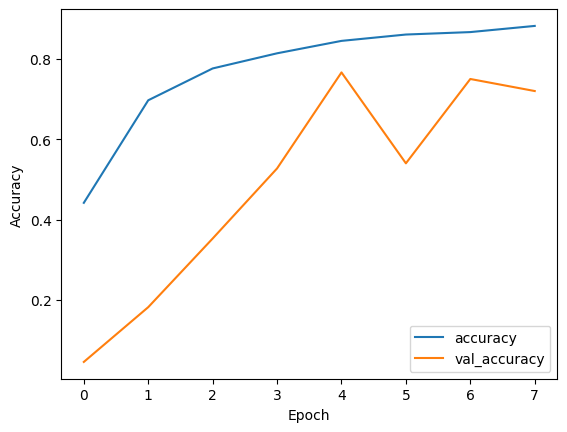

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

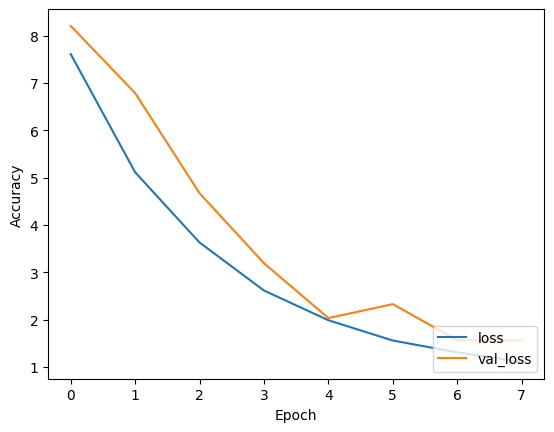

In [ ]:
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7069 - loss: 1.5486
Test Accuracy: 71.96%


In [ ]:
train_loss, train_acc = model.evaluate(x_train, y_train)
print(f"Test Accuracy: {train_acc * 100:.2f}%")

139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.8072 - loss: 1.2619
Test Accuracy: 79.76%


In [ ]:
model.save('plant_classification.h5')

In [ ]:
preds = model.predict(x_test[20:22])
predictions = np.argmax(preds, axis=1)
predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


array([10, 10])